In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [2]:
vin = pd.read_csv('winequality-white.csv', sep=';')

In [3]:
vin.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
vin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [5]:
vin.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [6]:
#adding TASTE column for binary classification
TASTE = list()
for i in vin['quality']:
    if i >= 7:
        i=1
        TASTE.append(i)
    else:
        i=0
        TASTE.append(i)
vin['TASTE'] = TASTE

In [7]:
vin.drop('quality', inplace=True, axis=1)
vin.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,TASTE
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,0


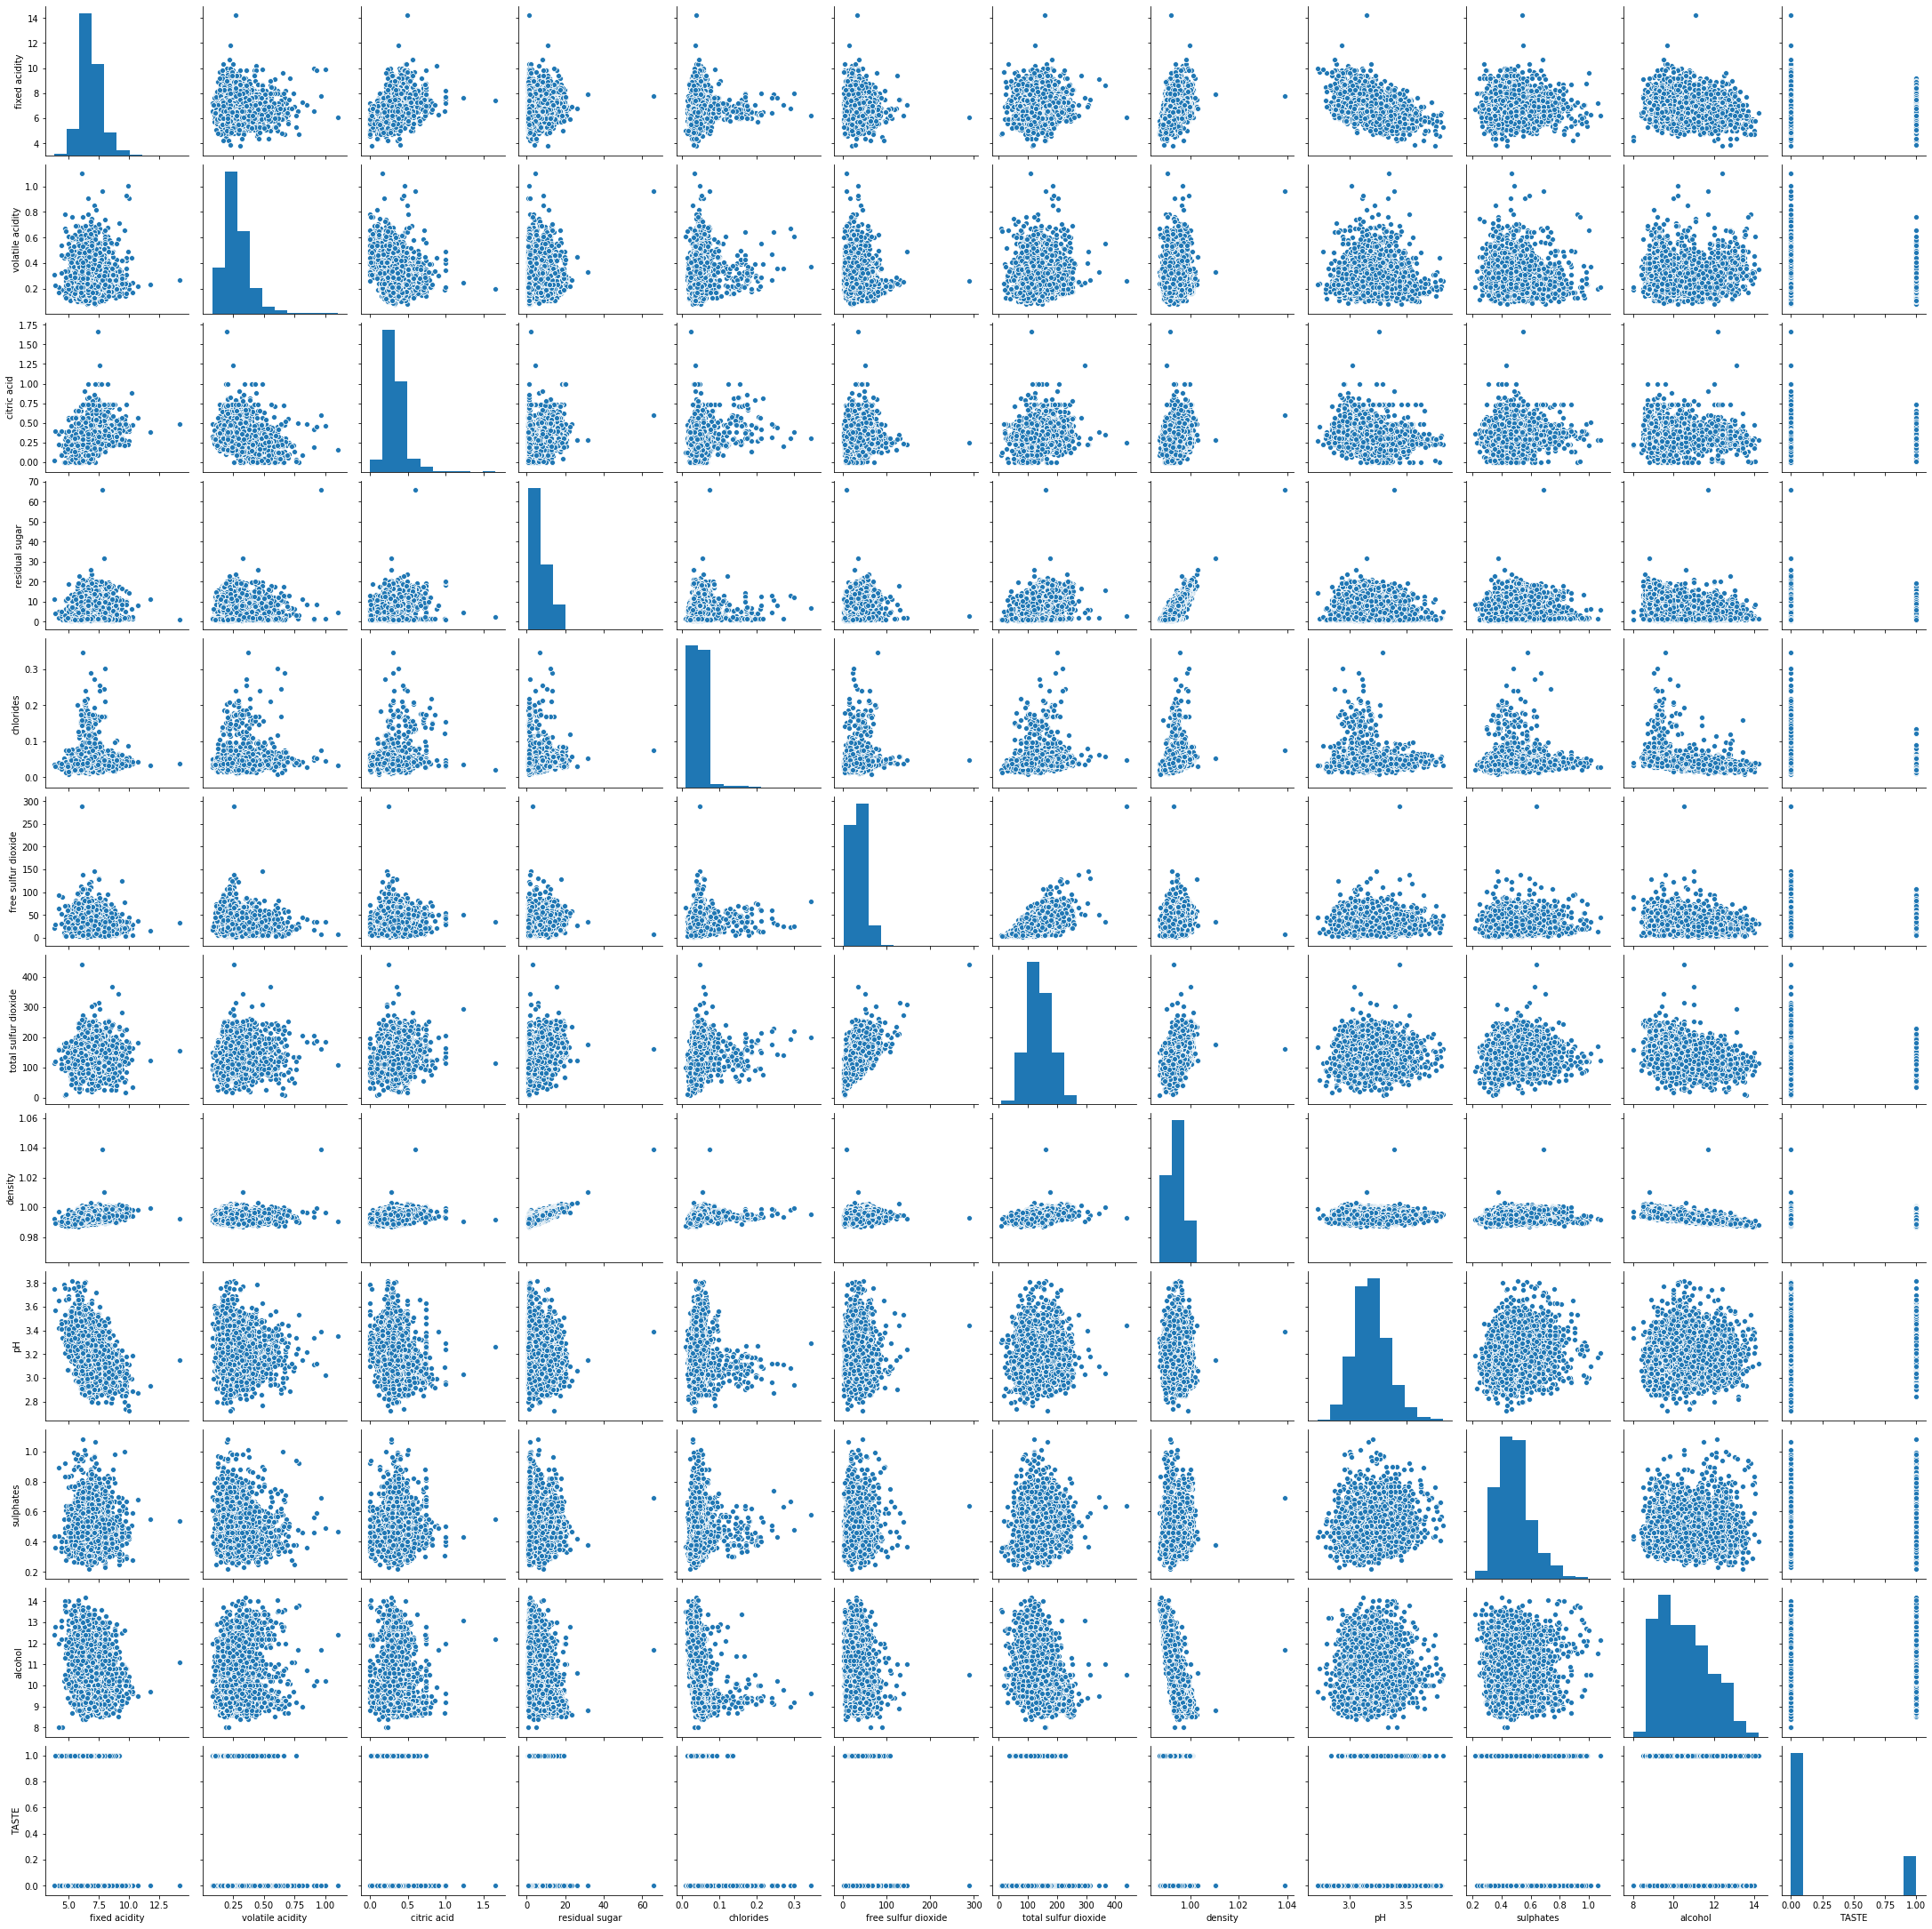

In [8]:
sns.pairplot(vin)

In [9]:
correlations = vin.corr()['TASTE'].drop('TASTE')
correlations

fixed acidity          -0.080748
volatile acidity       -0.067225
citric acid            -0.035330
residual sugar         -0.117085
chlorides              -0.183118
free sulfur dioxide    -0.023413
total sulfur dioxide   -0.162202
density                -0.283871
pH                      0.093510
sulphates               0.047410
alcohol                 0.385132
Name: TASTE, dtype: float64

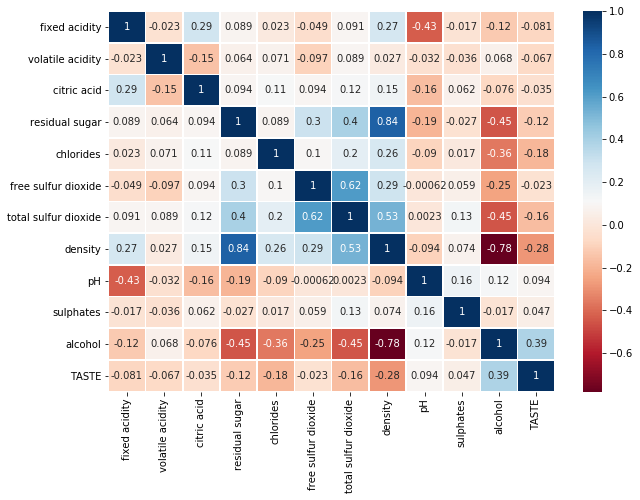

In [10]:
#heatmap to see correlation between features
plt.subplots(figsize=(10,7))
sns.heatmap(vin.corr(),linewidth=0.6, cmap='RdBu', annot=True)
#sns.heatmap(correlations)
plt.show()

In [11]:
vin['TASTE'].value_counts()

0    3838
1    1060
Name: TASTE, dtype: int64

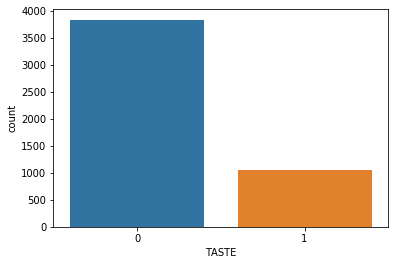

In [12]:
sns.countplot(x=vin['TASTE'])

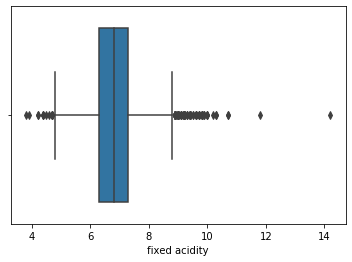

In [13]:
sns.boxplot(x=vin['fixed acidity'])

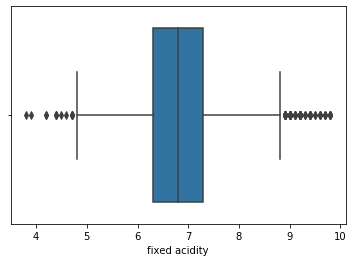

In [15]:
q = vin['fixed acidity'].quantile(0.999)
vin = vin[vin['fixed acidity'] < q]

sns.boxplot(x=vin['fixed acidity'])


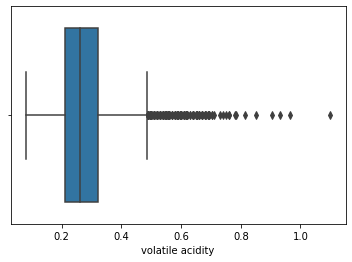

In [16]:
sns.boxplot(x=vin['volatile acidity'])

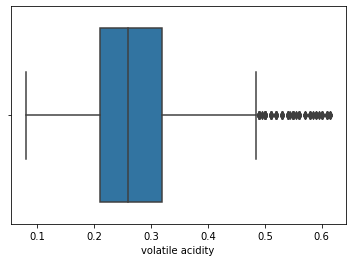

In [17]:
q = vin['volatile acidity'].quantile(0.99)
vin = vin[vin['volatile acidity'] < q]

sns.boxplot(x=vin['volatile acidity'])

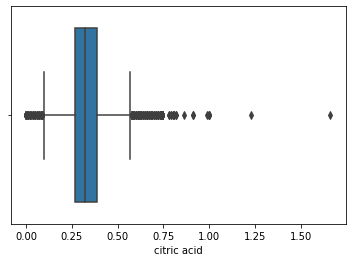

In [18]:
sns.boxplot(x=vin['citric acid'])

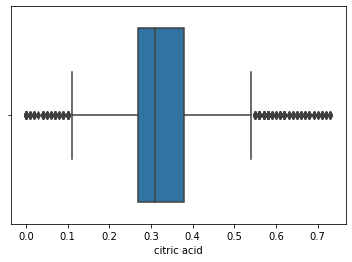

In [19]:
#removing the top 1% outliers
q = vin['citric acid'].quantile(0.99)
vin = vin[vin['citric acid'] < q]

sns.boxplot(x=vin['citric acid'])

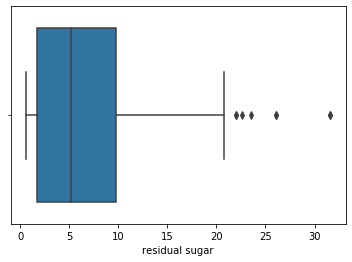

In [20]:
sns.boxplot(x=vin['residual sugar'])

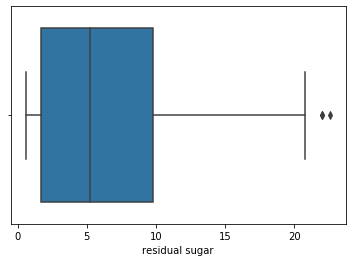

In [21]:
q = vin['residual sugar'].quantile(0.999)
vin = vin[vin['residual sugar'] < q]

sns.boxplot(x=vin['residual sugar'])

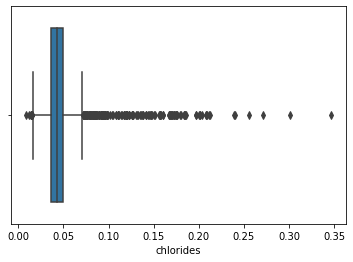

In [22]:
sns.boxplot(x=vin['chlorides'])

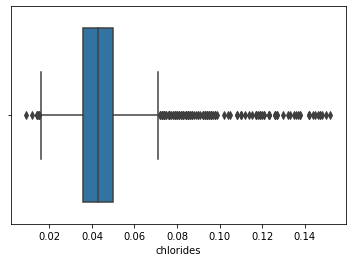

In [23]:
#removing the top 1% outliers
q = vin['chlorides'].quantile(0.99)
vin = vin[vin['chlorides'] < q]

sns.boxplot(x=vin['chlorides'])

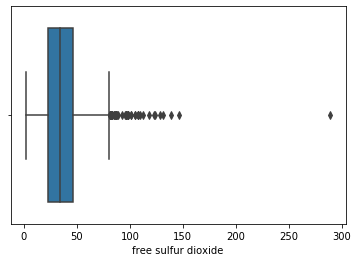

In [24]:
sns.boxplot(x=vin['free sulfur dioxide'])

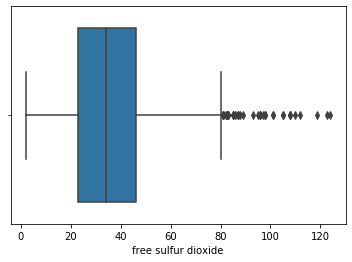

In [25]:
q = vin['free sulfur dioxide'].quantile(0.999)
vin = vin[vin['free sulfur dioxide'] < q]

sns.boxplot(x=vin['free sulfur dioxide'])

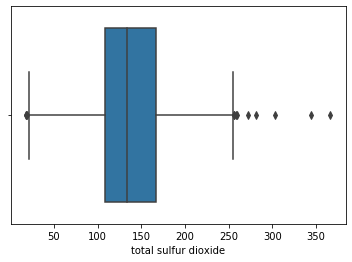

In [26]:
sns.boxplot(x=vin['total sulfur dioxide'])

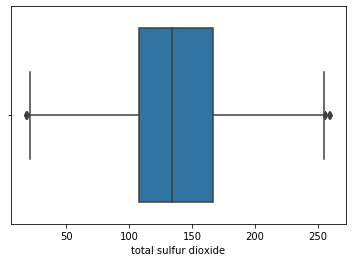

In [27]:
q = vin['total sulfur dioxide'].quantile(0.999)
vin = vin[vin['total sulfur dioxide'] < q]

sns.boxplot(x=vin['total sulfur dioxide'])

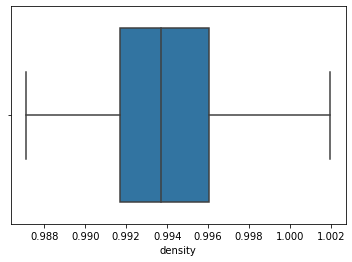

In [28]:
sns.boxplot(x=vin['density'])

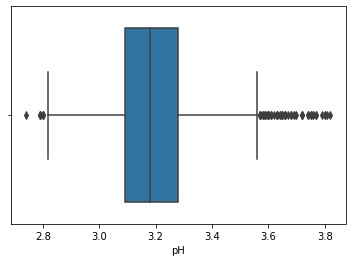

In [29]:
sns.boxplot(x=vin['pH'])

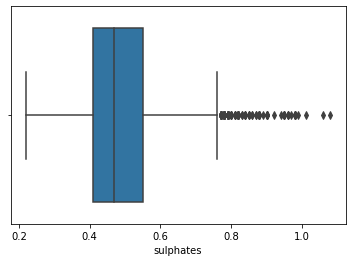

In [30]:
sns.boxplot(x=vin['sulphates'])

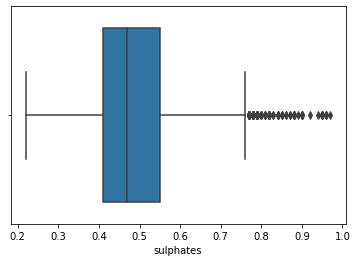

In [31]:
q = vin['sulphates'].quantile(0.999)
vin = vin[vin['sulphates'] < q]

sns.boxplot(x=vin['sulphates'])

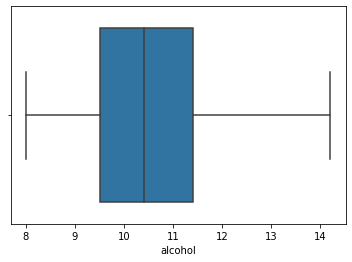

In [32]:
sns.boxplot(x=vin['alcohol'])

In [33]:
#splitting independent and dependent variables
X = vin.drop('TASTE', axis=1)
y = vin['TASTE']

print(X.shape)
print(y.shape)

(4698, 11)
(4698,)


In [34]:
#splitting data in test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3758, 11)
(3758,)
(940, 11)
(940,)


In [35]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [36]:
#Import svm model

#Create a svm Classifier
clf = svm.SVC() # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_test_pred = clf.predict(X_test)

#Predict responce for train dataset
y_train_pred = clf.predict(X_train)

In [37]:

# Model Accuracy
print("Accuracy of test:",metrics.accuracy_score(y_test, y_test_pred))
print("Accuracy of train:", metrics.accuracy_score(y_train, y_train_pred))

Accuracy of test: 0.8202127659574469
Accuracy of train: 0.8390101117615754


In [38]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89       729
           1       0.73      0.31      0.44       211

    accuracy                           0.82       940
   macro avg       0.78      0.64      0.67       940
weighted avg       0.81      0.82      0.79       940



In [39]:
print(confusion_matrix(y_test, y_test_pred))

[[705  24]
 [145  66]]


In [40]:
precision = precision_score(y_test, y_test_pred, average='binary')
print('Precision without gridsearch cv: %.3f' % precision)

recall = recall_score(y_test, y_test_pred,labels = [0,1], average='micro')
print('Recall without gridsearch cv: %.3f' % recall)



Precision without gridsearch cv: 0.733
Recall without gridsearch cv: 0.820


In [41]:
#grid search cv to find the best hyper paramters
param = {
    'C': [0.1,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.5,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(clf, param_grid=param, scoring='accuracy', cv=10)


In [ ]:
grid_svc.fit(X_train, y_train)

In [ ]:
#Best parameters for our svc model
grid_svc.best_params_

In [ ]:
#Running SVC again with the best parameters.
svc2 = svm.SVC(C = 1, gamma =  1, kernel= 'rbf')
svc2.fit(X_train, y_train)
pred_train_svc2 = clf.predict(X_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test, pred_svc2))

In [ ]:

print("Accuracy of test after gridsearch:",metrics.accuracy_score(y_test, pred_svc2))
print("Accuracy of train after gridsearch:", metrics.accuracy_score(y_train, pred_train_svc2))

In [ ]:
precision = precision_score(y_test, pred_svc2, average='binary')
print('Precision with gridsearch cv: %.3f' % precision)

recall = recall_score(y_test, pred_svc2,labels = [0,1], average='micro')
print('Recall with gridsearch cv: %.3f' % recall)

